¿
# Segmentación de Colores con HSV - Taller #1

###**Estudiante:** *Fredy Andres Castaño*
###**Materia:** *Procesamiento Digital de Imagenes*

Este notebook muestra cómo:
1. Descargar un ZIP de Google Drive (con `gdown`).  
2. Extraer y leer datos (si los hubiera).  
3. Cargar una imagen, convertirla a HSV.  
4. Eliminar un rango de tonos (por ejemplo, verdes).  
5. Reconstruir y visualizar resultados.


## 1. Importar bibliotecas y definir rutas

In [1]:
from skimage import color
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import gdown

# Ruta por defecto donde estarán las imágenes tras descomprimir
IMAGE_DIR = './images/'
IMAGE_NAME = 'flowers.jpg'

## 2. Función para descargar y descomprimir datos desde Google Drive

In [2]:
def load_and_extract_from_gdrive(file_id: str, zip_name: str = 'data.zip', extract_to: str = './'):
    """
    Descarga un archivo ZIP desde Google Drive y lo descomprime.

    Parámetros
    ----------
    file_id : str
        ID del archivo en Drive (compartido públicamente).
    zip_name : str
        Nombre local para el ZIP descargado.
    extract_to : str
        Carpeta donde descomprimir el contenido.
    """
    url = f'https://drive.google.com/uc?id={file_id}'
    print(f'Descargando {zip_name} desde Drive...')
    gdown.download(url, zip_name, quiet=False)

    print(f'Extrayendo {zip_name} en {extract_to}...')
    with zipfile.ZipFile(zip_name, 'r') as zf:
        zf.extractall(path=extract_to)
    os.remove(zip_name)
    print('¡Listo!')

## 3. Función de segmentación HSV

In [3]:

def remove_hsv_range(im_rgb: np.ndarray, hue_min_deg: float, hue_max_deg: float) -> np.ndarray:
    """
    Elimina (pone a cero) el canal V de todos los píxeles cuyo H esté en [hue_min_deg, hue_max_deg].

    Parámetros
    ----------
    im_rgb : np.ndarray
        Imagen en espacio RGB (valores [0,255] o [0,1]).
    hue_min_deg, hue_max_deg : float
        Rango de tono en grados (0–360).

    Devuelve
    -------
    fim_rgb : np.ndarray
        Imagen RGB reconstruida después de suprimir el canal V en ese rango.
    """
    # Convertir a [0,1] si es uint8
    if im_rgb.dtype == np.uint8:
        im_rgb = im_rgb.astype('float32') / 255.0

    hsv = color.rgb2hsv(im_rgb)
    h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

    # Normalizar ángulos a [0,1]
    h_deg = h * 360
    mask = (h_deg >= hue_min_deg) & (h_deg <= hue_max_deg)
    v[mask] = 0  # Suprimir valor

    hsv_mod = np.stack([h, s, v], axis=2)
    fim_rgb = color.hsv2rgb(hsv_mod)
    return hsv, hsv_mod, fim_rgb

In [5]:
load_and_extract_from_gdrive('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

Descargando data.zip desde Drive...


Downloading...
From: https://drive.google.com/uc?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
To: /content/data.zip
100%|██████████| 18.2M/18.2M [00:00<00:00, 154MB/s]


Extrayendo data.zip en ./...
¡Listo!


## 4. Carga de imagen y ejecución

In [6]:
# Cargar imagen
img_path = os.path.join(IMAGE_DIR, IMAGE_NAME)
im = imread(img_path)
print(f"Dimensiones de la imagen: {im.shape}")
print(f"Intensidades min/max: {im.min():.3f} / {im.max():.3f}")

# Procesar: aquí eliminamos verdes entre 40° y 160°
hsv_orig, hsv_mod, final_im = remove_hsv_range(im, hue_min_deg=40, hue_max_deg=160)

Dimensiones de la imagen: (640, 960, 3)
Intensidades min/max: 0.000 / 255.000


## 5. Visualización de resultados

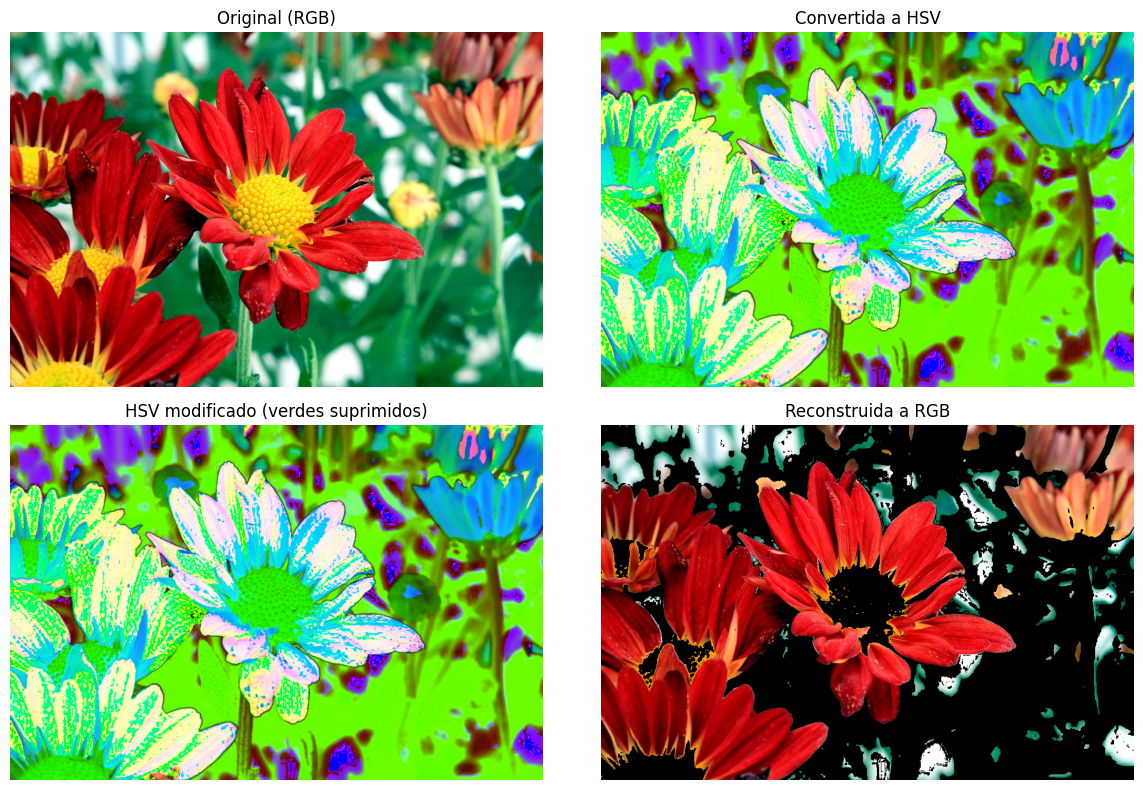

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

axes[0].imshow(im)
axes[0].set_title('Original (RGB)')
axes[0].axis('off')

axes[1].imshow(hsv_orig)
axes[1].set_title('Convertida a HSV')
axes[1].axis('off')

axes[2].imshow(hsv_mod)
axes[2].set_title('HSV modificado (verdes suprimidos)')
axes[2].axis('off')

axes[3].imshow(final_im)
axes[3].set_title('Reconstruida a RGB')
axes[3].axis('off')

plt.tight_layout()
plt.show()

### Ajustes y recomendaciones

- Para **otros rangos de color**, modifica `hue_min_deg` y `hue_max_deg`.